# A Convolutional NN written using Keras for detecting handwritten digits

In [6]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from keras import backend as K

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
history = model.fit(x_train, y_train, epochs=12, batch_size=128, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 400s 7ms/step - loss: 0.1684 - acc: 0.9494 - val_loss: 0.0509 - val_acc: 0.9837
Epoch 2/12
60000/60000 [==============================] - 371s 6ms/step - loss: 0.0801 - acc: 0.9762 - val_loss: 0.0453 - val_acc: 0.9849
Epoch 3/12
60000/60000 [==============================] - 371s 6ms/step - loss: 0.0614 - acc: 0.9811 - val_loss: 0.0371 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 374s 6ms/step - loss: 0.0505 - acc: 0.9846 - val_loss: 0.0312 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 383s 6ms/step - loss: 0.0428 - acc: 0.9867 - val_loss: 0.0324 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 379s 6ms/step - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0357 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 379s 6ms/step - loss: 0.0331 - acc: 0.9893 - val_loss: 0.0282 - 

10000/10000 [==============================] - 22s 2ms/step
Results on Test Data : Loss = 0.030501506487295275, accuracy = 0.9922


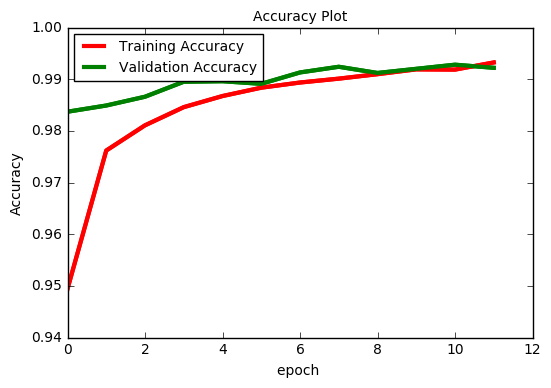

In [19]:
from matplotlib import pyplot as plt

[test_loss, test_acc] = model.evaluate(x_test, y_test)
print("Results on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###plotting the graphs for Accuracy

plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'g',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10, loc="best")
plt.xlabel('epoch ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Plot',fontsize=10)

plt.show()